In [35]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10, 'figure.dpi': 300, 'figure.figsize': (4.7747, 5)})

from model_2 import Agent

## Convolutional recurrent model

In [2]:
crnn_agent = Agent(num_timesteps=10)

Model: "crnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CNN (Sequential)             (10, 2560)                190       
_________________________________________________________________
GRU (GRU)                    multiple                  249024    
_________________________________________________________________
prediction (Dense)           multiple                  33        
Total params: 249,247
Trainable params: 249,247
Non-trainable params: 0
_________________________________________________________________


In [3]:
crnn_agent.train(7000, 3)

Training: 100%|██████████| 7000/7000 [33:15<00:00,  3.51it/s]


Ignored 0 samples, because of IndexErrors.


In [4]:
loss = crnn_agent.test(5000)

Testing: 100%|██████████| 5000/5000 [07:39<00:00, 10.88it/s]

Pearson correlation coefficient between predicted and actual data is 0.6897463431488257


No handles with labels found to put in legend.
100%|██████████| 3000/3000 [05:17<00:00,  9.45it/s]


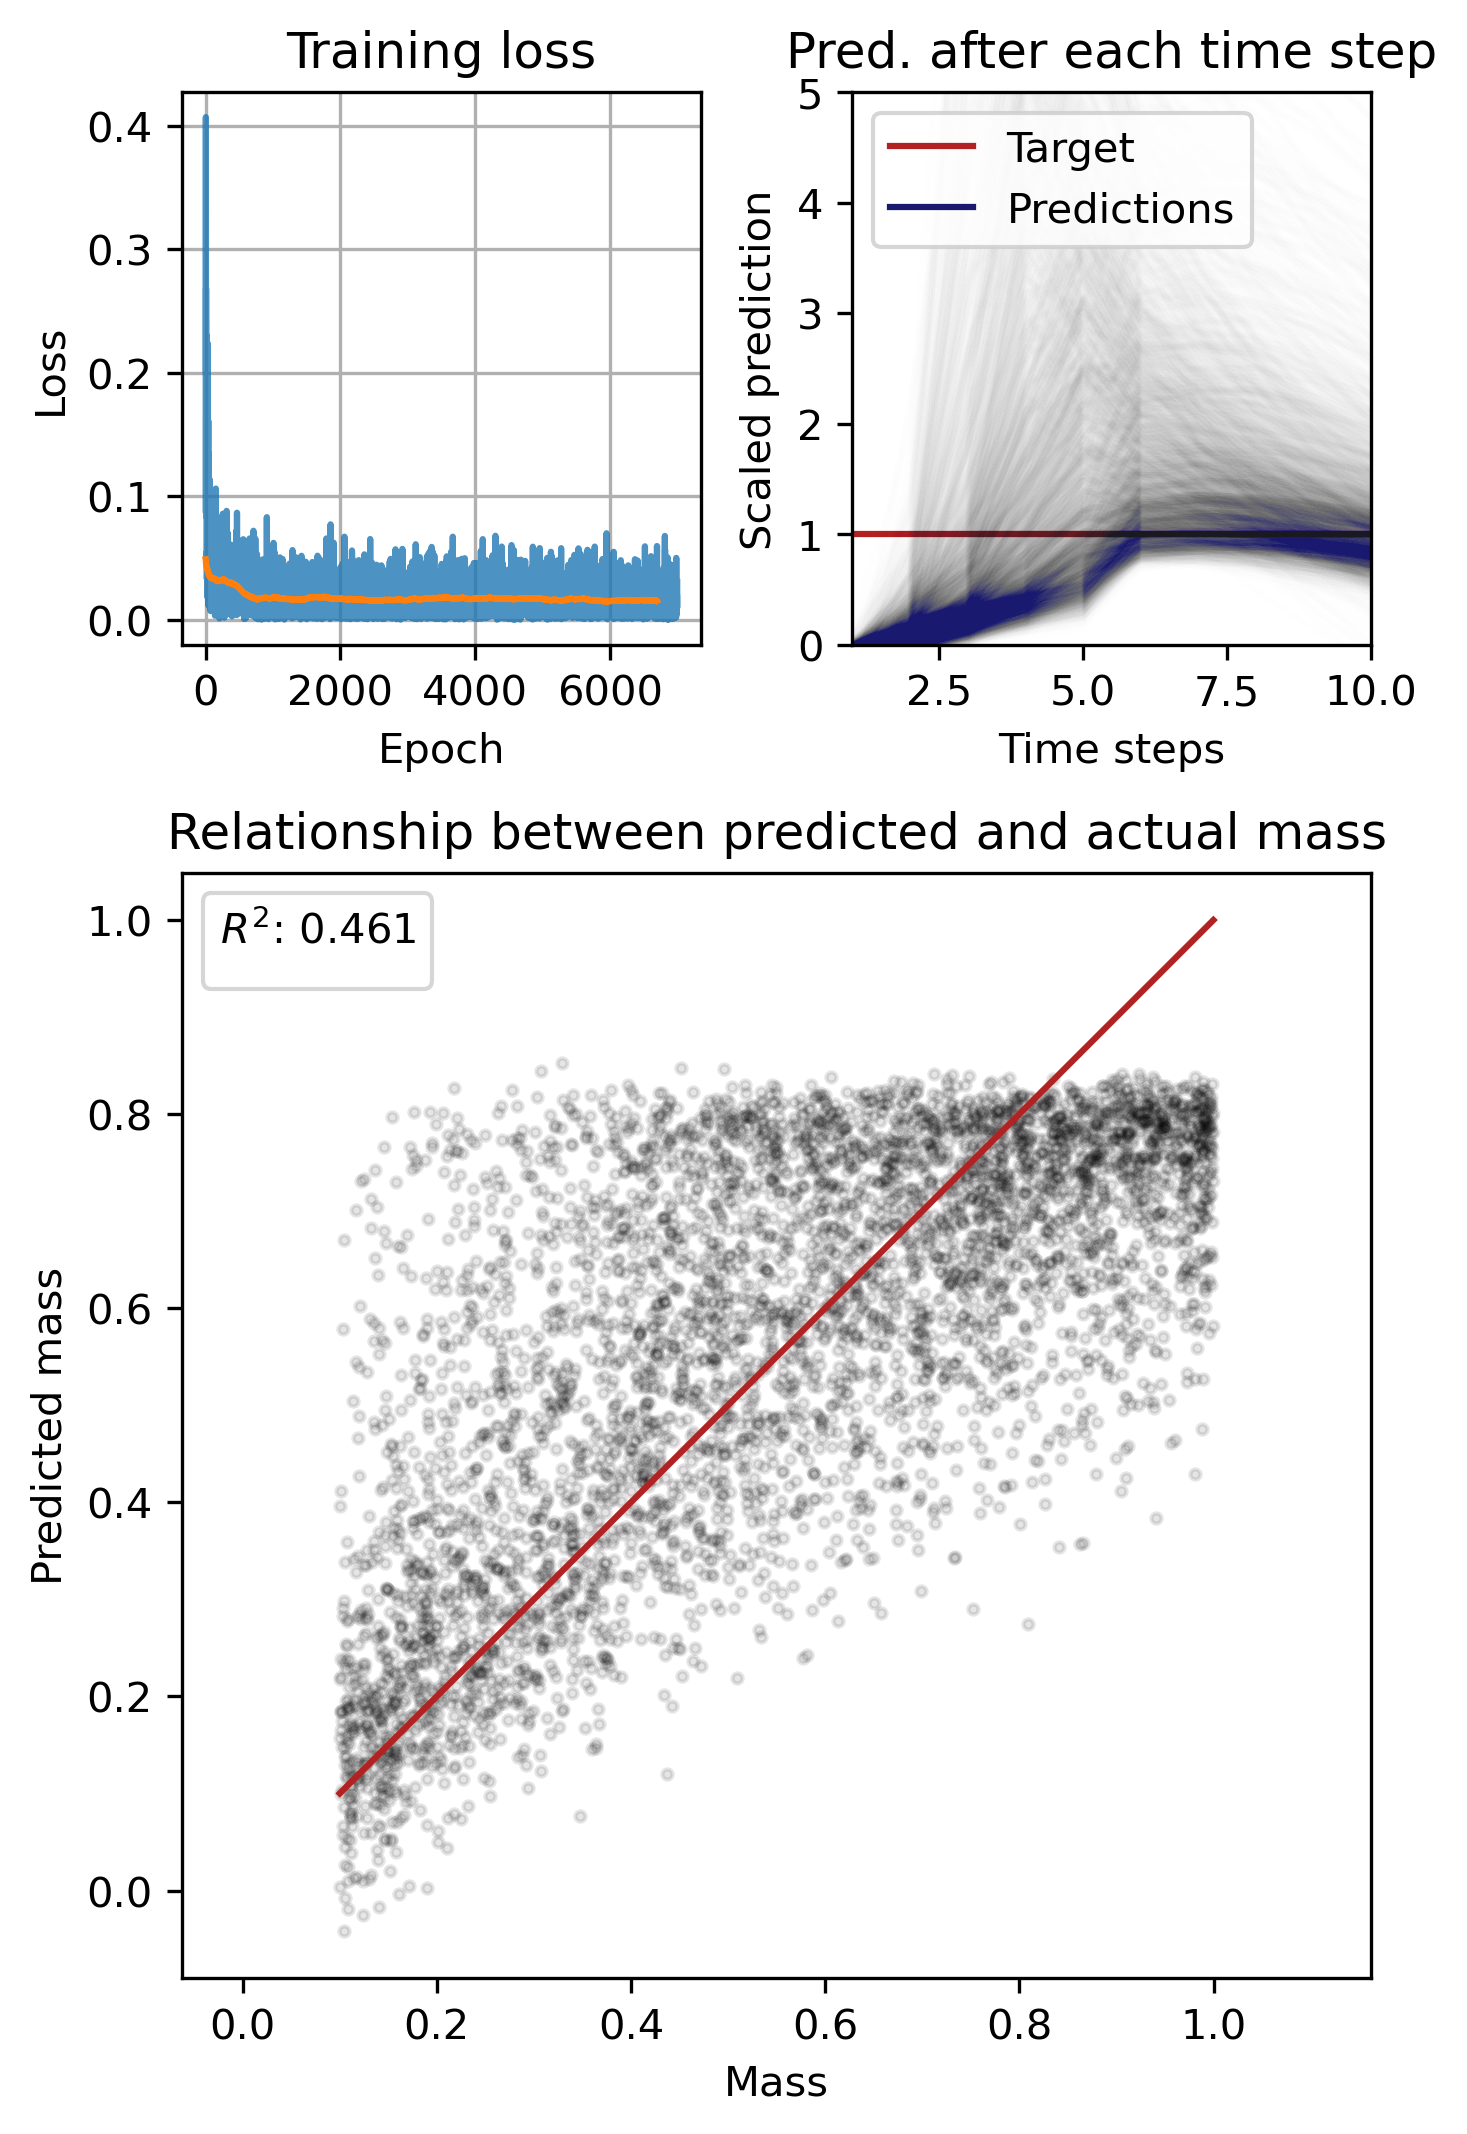

In [5]:
fig = plt.figure(figsize=(4.7747, 7), constrained_layout=True)
gs = fig.add_gridspec(3, 2)

testing_ax = fig.add_subplot(gs[1:, :])
crnn_agent.plot_test(fig=fig, ax=testing_ax)
testing_ax.set_title("Relationship between predicted and actual mass")

training_ax = fig.add_subplot(gs[0, 0])
crnn_agent.plot_training(fig=fig, ax=training_ax)
training_ax.set_title("Training loss")

predictions_ax = fig.add_subplot(gs[0, 1])
crnn_agent.plot_predictions(3000, fig=fig, ax=predictions_ax)
predictions_ax.set_title("Pred. after each time step")

plt.savefig(f"../latex/plots/crnn_results_{crnn_agent.model.num_timesteps}.png")
plt.show()

## Pure recurrent model

In [6]:
rnn_agent = Agent(num_timesteps=15, model_type="rnn")

Model: "crnn_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Sequential)           (15, 32)                  65568     
_________________________________________________________________
GRU (GRU)                    multiple                  6336      
_________________________________________________________________
prediction (Dense)           multiple                  33        
Total params: 71,937
Trainable params: 71,937
Non-trainable params: 0
_________________________________________________________________


In [7]:
rnn_agent.train(5000, 1)

Training: 100%|██████████| 5000/5000 [07:43<00:00, 10.80it/s]


Ignored 0 samples, because of IndexErrors.


In [8]:
rnn_agent.test(2000)

Testing: 100%|██████████| 2000/2000 [03:00<00:00, 11.08it/s]

Pearson correlation coefficient between predicted and actual data is -0.04183350478829644


<tf.Tensor: shape=(), dtype=float32, numpy=0.028495658>

No handles with labels found to put in legend.


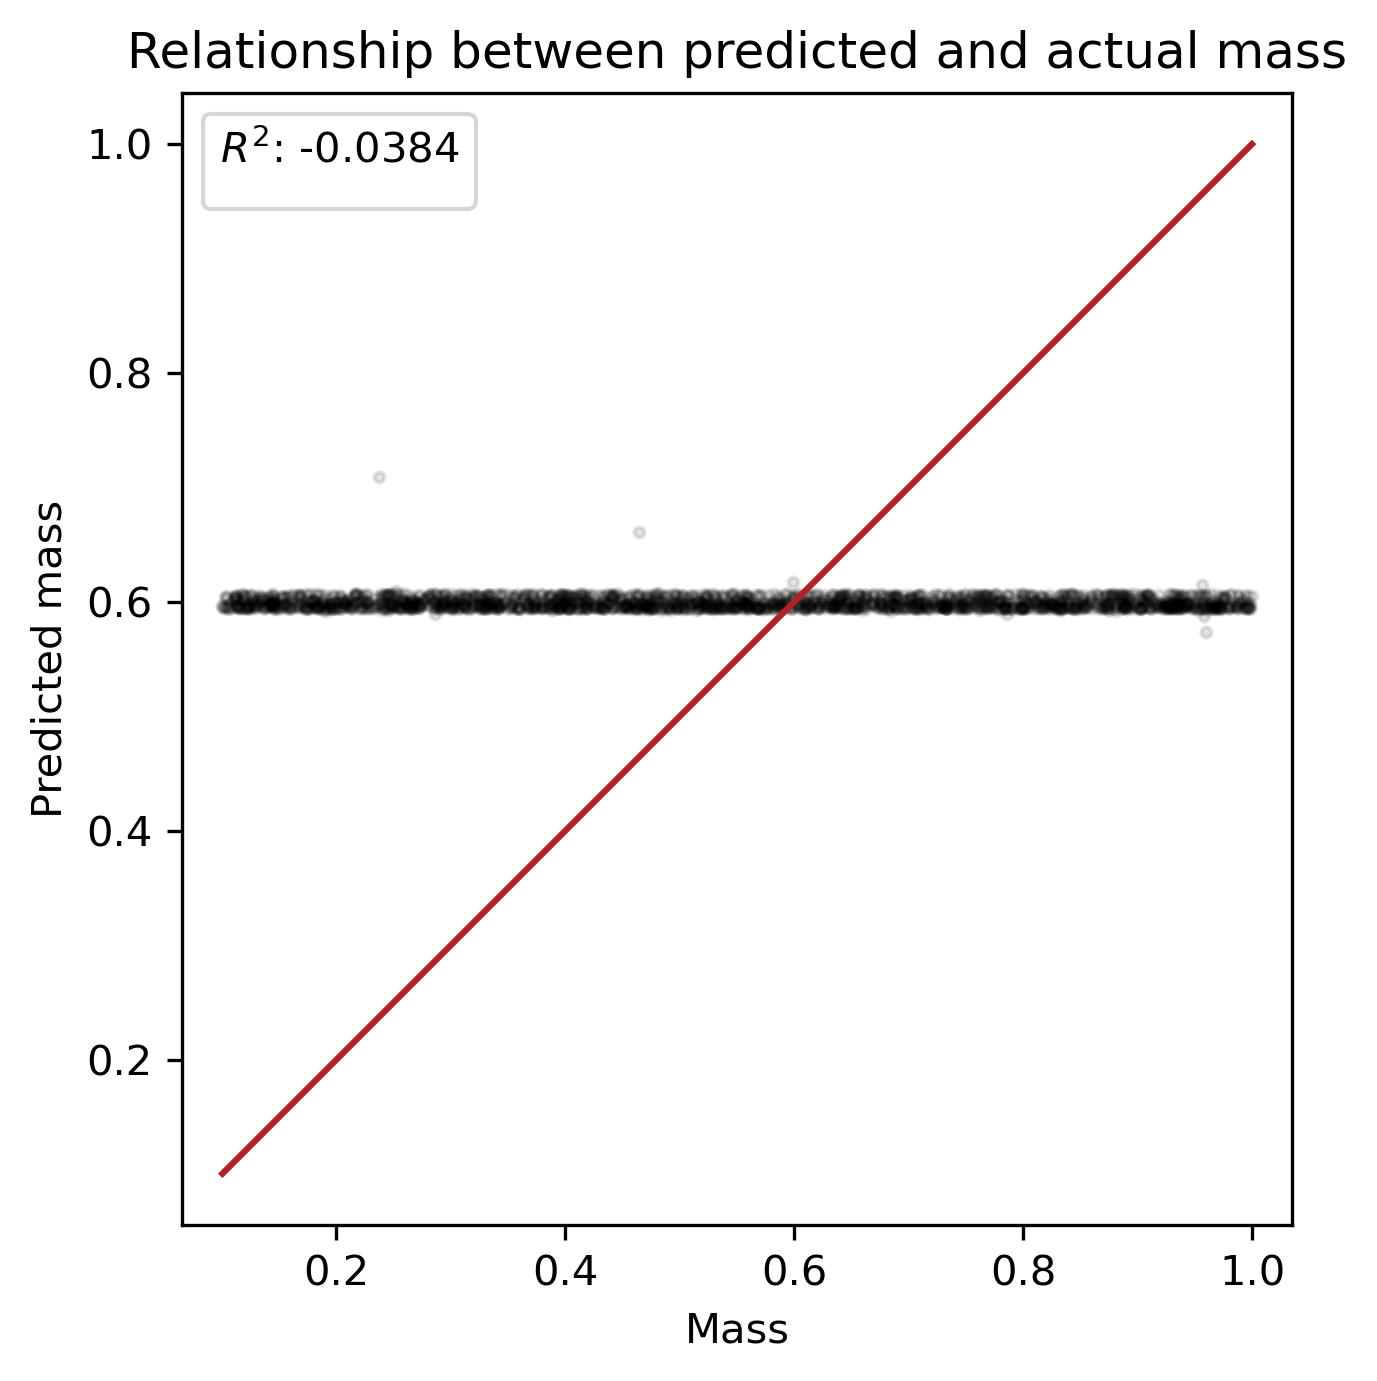

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(4.7747, 5))
rnn_agent.plot_test(fig=fig, ax=ax)
ax.set_title("Relationship between predicted and actual mass")

plt.savefig("../latex/plots/rnn_results.png")
plt.show()